# Adam Forestier

### October 13, 2023

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from sklearn.compose import make_column_transformer
from sklearn.ensemble import (AdaBoostRegressor, RandomForestRegressor)
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (MinMaxScaler, OneHotEncoder)

### 🛠 01. Neural network regression with TensorFlow Exercises

1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
  * Building a larger model (how does one with 4 dense layers go?).
  * Increasing the number of units in each layer.
  * Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
  * What happens if you train for longer (say 300 epochs instead of 200)?
4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it.

### 1.

In [9]:
# Feature & label
X = tf.constant(np.arange(-7.0, 14.0, 3), dtype='float32')
y = tf.constant(np.arange(3.0, 24.0, 3), dtype='float32')
X_train, X_test, y_train, y_test = X[:int(len(X) * .8)], X[int(len(X) * .8):], y[:int(len(y) * .8)], y[int(len(y) * .8):]

### 2.

In [11]:
# Build, compile, fit
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.mae,
    metrics=['mae']
)

model.fit(x=tf.expand_dims(input=X_train, axis=-1), y=y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 9.3248 - mae: 9.3248
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 9.3026 - mae: 9.3026
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 9.2806 - mae: 9.2806
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 9.2588 - mae: 9.2588
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 9.2371 - mae: 9.2371
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 9.2156 - mae: 9.2156
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 9.1942 - mae: 9.1942
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 9.1729 - mae: 9.1729
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 9.1518 - mae: 9.1518
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 9.1306 - mae: 9.1306
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - loss

In [12]:
model.evaluate(x=X_test, y=y_test)

1/1 [==============================] - 0s 266ms/step - loss: 20.8710 - mae: 20.8710


[20.870983123779297, 20.870983123779297]

### 3.

In [13]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.mae,
    metrics=['mae']
)

model.fit(x=tf.expand_dims(input=X_train, axis=-1), y=y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 8.5764 - mae: 8.5764
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 8.9034 - mae: 8.9034
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 8.9463 - mae: 8.9463
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 8.8629 - mae: 8.8629
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 8.7094 - mae: 8.7094
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 8.5112 - mae: 8.5112
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 8.5395 - mae: 8.5395
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 8.6018 - mae: 8.6018
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 8.5008 - mae: 8.5008
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 8.2905 - mae: 8.2905
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - loss

In [14]:
model.evaluate(x=X_test, y=y_test)

1/1 [==============================] - 0s 204ms/step - loss: 1.3295 - mae: 1.3295


[1.329458236694336, 1.329458236694336]

In [15]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=.025),
    loss=tf.keras.losses.mae,
    metrics=['mae']
)

model.fit(x=tf.expand_dims(input=X_train, axis=-1), y=y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 8.5894 - mae: 8.5894
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 35.5654 - mae: 35.5654
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 16.0340 - mae: 16.0340
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 10.9194 - mae: 10.9194
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 7.9767 - mae: 7.9767
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 7.9156 - mae: 7.9156
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 7.9043 - mae: 7.9043
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 7.9235 - mae: 7.9235
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 6.6416 - mae: 6.6416
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 6.2935 - mae: 6.2935
Epoch 11/100
1/1 [==============================] - 0s 11ms/step 

In [16]:
model.evaluate(x=X_test, y=y_test)

1/1 [==============================] - 0s 131ms/step - loss: 0.6915 - mae: 0.6915


[0.691533088684082, 0.691533088684082]

In [19]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=.025),
    loss=tf.keras.losses.mae,
    metrics=['mae']
)

history = model.fit(x=tf.expand_dims(input=X_train, axis=-1), y=y_train, epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 9.1001 - mae: 9.1001
Epoch 2/200
1/1 [==============================] - 0s 13ms/step - loss: 26.5856 - mae: 26.5856
Epoch 3/200
1/1 [==============================] - 0s 12ms/step - loss: 23.5508 - mae: 23.5508
Epoch 4/200
1/1 [==============================] - 0s 11ms/step - loss: 11.6273 - mae: 11.6273
Epoch 5/200
1/1 [==============================] - 0s 9ms/step - loss: 7.8262 - mae: 7.8262
Epoch 6/200
1/1 [==============================] - 0s 12ms/step - loss: 7.7731 - mae: 7.7731
Epoch 7/200
1/1 [==============================] - 0s 10ms/step - loss: 7.3307 - mae: 7.3307
Epoch 8/200
1/1 [==============================] - 0s 11ms/step - loss: 7.2346 - mae: 7.2346
Epoch 9/200
1/1 [==============================] - 0s 16ms/step - loss: 5.8051 - mae: 5.8051
Epoch 10/200
1/1 [==============================] - 0s 13ms/step - loss: 4.6328 - mae: 4.6328
Epoch 11/200
1/1 [==============================] - 0s 16ms/step -

In [18]:
model.evaluate(x=X_test, y=y_test)

1/1 [==============================] - 0s 295ms/step - loss: 0.6969 - mae: 0.6969


[0.6969127655029297, 0.6969127655029297]

<Axes: >

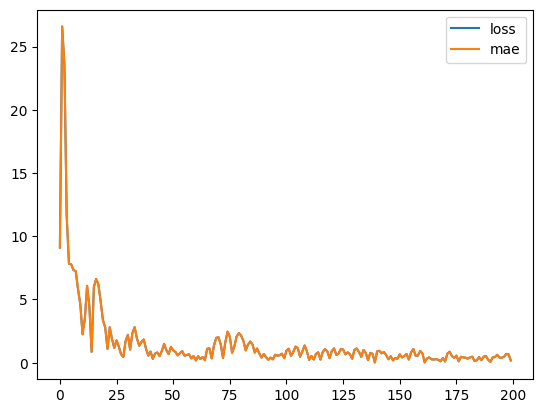

In [20]:
pd.DataFrame(history.history).plot()

### 4.

In [29]:
boston_dataset = tf.keras.datasets.boston_housing
(X_train, y_train), (X_test, y_test) = boston_dataset.load_data()

In [33]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.mae,
    metrics=['mae']
)

history = model.fit(x=tf.expand_dims(input=X_train, axis=-1), y=y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 28.2677 - mae: 28.2677
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 21.4500 - mae: 21.4500
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 19.7533 - mae: 19.7533
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 19.3780 - mae: 19.3780
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 19.1691 - mae: 19.1691
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 19.0121 - mae: 19.0121
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 18.8598 - mae: 18.8598
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 18.7232 - mae: 18.7232
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 18.5984 - mae: 18.5984
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 18.4437 - mae: 18.4437
Epoch 11/100
13/13 [===================

In [34]:
model.evaluate(x=X_test, y=y_test)

4/4 [==============================] - 0s 4ms/step - loss: 6.6795 - mae: 6.6795


[6.679514408111572, 6.679514408111572]

Text(0, 0.5, 'loss')

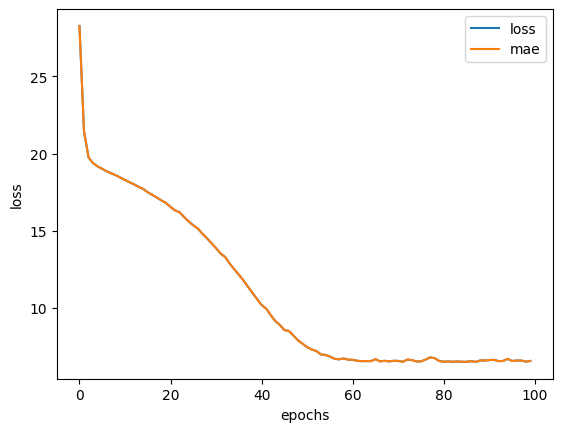

In [38]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

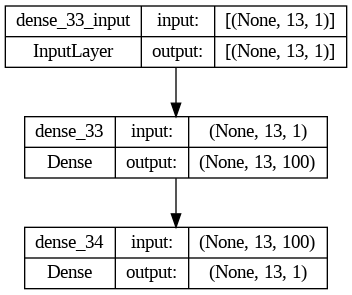

In [39]:
tf.keras.utils.plot_model(model, show_shapes=True)